# 회의 결과 반영
 - 리뷰수 0개인 값 제거 (리뷰가 없으면 평가를 할 수 없으므로 제거)
 - 슈퍼호스트 null 값 제거
 - 욕실수, 침실수, 침대수 결측치 처리
 - 가격 결측치 처리 (유형별 평균으로 대체)
 - 다양한 결측치 대체법 사용해보기

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [465]:
# 한글깨짐 방지
import koreanize_matplotlib

In [466]:
# 데이터 불러오기
path='../data/Paris/listings.csv'
pd.read_csv(path)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84392,1112562855977040914,https://www.airbnb.com/rooms/1112562855977040914,20240316023852,2024-03-19,city scrape,Artists neighbour apt /private yard 10mn Print...,Simplify your life at this peaceful place<br /...,NaN,https://a0.muscache.com/pictures/692d2ee5-8469...,448413156,...,NaN,NaN,NaN,7510164795125,t,15,15,0,0,NaN
84393,1112591023192990750,https://www.airbnb.com/rooms/1112591023192990750,20240316023852,2024-03-18,city scrape,Appartement Tour Eiffel - Porte Dauphine - 2 Pers,Nestled in the heart of the prestigious 16th a...,"A l’orée du bois, le jardin du Ranelagh est un...",https://a0.muscache.com/pictures/miso/Hosting-...,528792181,...,NaN,NaN,NaN,7511612355663,t,6,6,0,0,NaN
84394,1112842648117310093,https://www.airbnb.com/rooms/1112842648117310093,20240316023852,2024-03-19,city scrape,1621: Prime spot in Paris Olympic Games 2024,Discover the allure of our generously proporti...,Embark on an enchanting voyage of discovery th...,https://a0.muscache.com/pictures/prohost-api/H...,530443572,...,NaN,NaN,NaN,7510912350413,t,6,6,0,0,NaN
84395,1112843324939236177,https://www.airbnb.com/rooms/1112843324939236177,20240316023852,2024-03-18,city scrape,Stylish flat in the heart of the city,Welcome to Paris! We are delighted to welcome ...,The 6th arrondissement is home to Saint-Germai...,https://a0.muscache.com/pictures/prohost-api/H...,504268004,...,NaN,NaN,NaN,7510608018554,t,47,47,0,0,NaN


In [467]:
raw = pd.read_csv(path)
dat = raw.copy()
dat.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


In [468]:
# 숙소 관련 테이블
# 02와 변경점 ('host_response_time','host_response_rate','host_acceptance_rate'[ 답변_평균시간, 문의_응답률, 예약_수락률] 삭제)
# >> 이유 : 슈퍼 호스트 기준에 포함되는 속성들이라 중복됨.
df_lodging = dat[['id', 'host_id','host_is_superhost','host_total_listings_count','neighbourhood_cleansed',
                  'room_type','accommodates','bathrooms','bedrooms','beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,host_id,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,3109,3631,f,2.0,Observatoire,Entire home/apt,2,1.0,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30
1,165409,788732,t,1.0,Temple,Entire home/apt,2,1.0,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365
2,5396,7903,f,3.0,Hôtel-de-Ville,Entire home/apt,2,1.0,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125


In [469]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)


,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,3109,3631,f,2.0,Observatoire,Entire home/apt,2,1.0,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30
1,165409,788732,t,1.0,Temple,Entire home/apt,2,1.0,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365
2,5396,7903,f,3.0,Hôtel-de-Ville,Entire home/apt,2,1.0,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125


In [470]:
# 리뷰 데이터 테이블
df_review = dat[['number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_review.head(3)


,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19


In [471]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})
df_review.head()


,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19
3,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51
4,126,3,4.86,4.93,4.82,4.96,4.97,4.94,4.82,0.99


01 전처리 과정 중 통합된 테이블의 필요성을 느낌

In [472]:
# 테이블 합치기
df = pd.concat([df_lodging,df_review], axis=1)
df.head()

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,3109,3631,f,2.0,Observatoire,Entire home/apt,2,1.0,1.0,1.0,...,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,165409,788732,t,1.0,Temple,Entire home/apt,2,1.0,0.0,1.0,...,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,5396,7903,f,3.0,Hôtel-de-Ville,Entire home/apt,2,1.0,0.0,1.0,...,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19
3,166370,793032,f,3.0,Entrepôt,Entire home/apt,4,1.0,1.0,1.0,...,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51
4,39948,171483,t,2.0,Bourse,Private room,2,NaN,NaN,NaN,...,126,3,4.86,4.93,4.82,4.96,4.97,4.94,4.82,0.99


In [473]:
# 정보 확인
df.info()
# total 24 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84397 non-null  int64  
 1   호스트_id       84397 non-null  int64  
 2   슈퍼호스트        84306 non-null  object 
 3   숙소_수         84390 non-null  float64
 4   숙소_지역        84397 non-null  object 
 5   숙소_유형        84397 non-null  object 
 6   수용인원수        84397 non-null  int64  
 7   욕실수          60959 non-null  float64
 8   침실수          77480 non-null  float64
 9   침대수          60828 non-null  float64
 10  편의시설         84397 non-null  object 
 11  숙소_가격        60917 non-null  object 
 12  최소_숙박일       84397 non-null  int64  
 13  최대_숙박일       84397 non-null  int64  
 14  리뷰수          84397 non-null  int64  
 15  30일_리뷰수      84397 non-null  int64  
 16  리뷰점수         58827 non-null  float64
 17  숙소_정확성_리뷰점수  58793 non-null  float64
 18  숙소_청결도_리뷰점수  58797 non-null  float64
 19  숙소_체

## 결측치 처리
 - 각 유형별 평균값으로 대체

리뷰수가 0개인 값 제거

In [474]:
df = df.dropna(subset=['리뷰점수'])

In [475]:
df.isnull().sum()

숙소_id              0
호스트_id             0
슈퍼호스트             77
숙소_수               0
숙소_지역              0
숙소_유형              0
수용인원수              0
욕실수            16979
침실수             5018
침대수            17052
편의시설               0
숙소_가격          17011
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수       34
숙소_청결도_리뷰점수       30
숙소_체크인_리뷰점수       43
숙소_소통_리뷰점수        32
숙소_위치_리뷰점수        40
숙소_가격_리뷰점수        45
평균_리뷰수             5
dtype: int64

In [476]:
df.shape

(58827, 24)

슈퍼 호스트 결측치 처리

In [477]:
df['슈퍼호스트'].isnull().sum()

77

In [478]:
# 슈퍼호스트 결측치 개수가 전체 데이터에 몇 퍼센트인지 확인
91 / 84397 * 100 
# 0.1% -> 재거 가능

0.10782373781058568

In [479]:
df = df.dropna(subset=['슈퍼호스트'])

In [480]:
# 다른 null값 확인
df.isnull().sum()

숙소_id              0
호스트_id             0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
숙소_유형              0
수용인원수              0
욕실수            16961
침실수             5008
침대수            17034
편의시설               0
숙소_가격          16993
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수       34
숙소_청결도_리뷰점수       30
숙소_체크인_리뷰점수       43
숙소_소통_리뷰점수        32
숙소_위치_리뷰점수        40
숙소_가격_리뷰점수        45
평균_리뷰수             5
dtype: int64

In [481]:
df.shape

(58750, 24)

욕실수            16961
침실수             5008
침대수            17034
 - 일단 각 숙소 유형 당 평균 값으로 대체

In [482]:
# 처리 전 기초통계량 확인
t1 = df['욕실수'].describe()
t2 = df['침실수'].describe()
t3 = df['침대수'].describe()

print(t1)
print(t2)
print(t3)

count    41789.000000
mean         1.180801
std          0.518611
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         48.000000
Name: 욕실수, dtype: float64
count    53742.000000
mean         1.270868
std          0.865813
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: 침실수, dtype: float64
count    41716.000000
mean         1.758606
std          1.232322
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         77.000000
Name: 침대수, dtype: float64


In [483]:
df['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [484]:
# 욕실수 유형별 평균값
type1 = round(df[df['숙소_유형'] == 'Entire home/apt']['욕실수'].mean(), 2)
type2 = round(df[df['숙소_유형'] == 'Private room']['욕실수'].mean(),2)
type3 = round(df[df['숙소_유형'] == 'Shared room']['욕실수'].mean(),2)
type4 = round(df[df['숙소_유형'] == 'Hotel room']['욕실수'].mean(),2)

print(type1)
print(type2)
print(type3)
print(type4)

1.19
1.1
1.01
1.07


In [485]:
# 각 유형별 결측치 대체
df.loc[(df['숙소_유형'] == 'Entire home/apt') & (df['욕실수'].isnull()), '욕실수'] = type1
df.loc[(df['숙소_유형'] == 'Private room') & (df['욕실수'].isnull()), '욕실수'] = type2
df.loc[(df['숙소_유형'] == 'Shared room') & (df['욕실수'].isnull()), '욕실수'] = type3
df.loc[(df['숙소_유형'] == 'Hotel room') & (df['욕실수'].isnull()), '욕실수'] = type4

In [486]:
df['욕실수'].isnull().sum()

0

In [487]:
# 침실수 유형별 평균값
type1 = round(df[df['숙소_유형'] == 'Entire home/apt']['침실수'].mean(), 2)
type2 = round(df[df['숙소_유형'] == 'Private room']['침실수'].mean(),2)
type3 = round(df[df['숙소_유형'] == 'Shared room']['침실수'].mean(),2)
type4 = round(df[df['숙소_유형'] == 'Hotel room']['침실수'].mean(),2)

print(type1)
print(type2)
print(type3)
print(type4)

1.29
1.14
1.0
1.09


In [488]:
# 각 유형별 결측치 대체
df.loc[(df['숙소_유형'] == 'Entire home/apt') & (df['침실수'].isnull()), '침실수'] = type1
df.loc[(df['숙소_유형'] == 'Private room') & (df['침실수'].isnull()), '침실수'] = type2
df.loc[(df['숙소_유형'] == 'Shared room') & (df['침실수'].isnull()), '침실수'] = type3
df.loc[(df['숙소_유형'] == 'Hotel room') & (df['침실수'].isnull()), '침실수'] = type4

In [489]:
df['침실수'].isnull().sum()

0

In [490]:
# 침대수 유형별 평균값
type1 = round(df[df['숙소_유형'] == 'Entire home/apt']['침대수'].mean(), 2)
type2 = round(df[df['숙소_유형'] == 'Private room']['침대수'].mean(),2)
type3 = round(df[df['숙소_유형'] == 'Shared room']['침대수'].mean(),2)
type4 = round(df[df['숙소_유형'] == 'Hotel room']['침대수'].mean(),2)

print(type1)
print(type2)
print(type3)
print(type4)

1.81
1.32
1.68
1.43


In [491]:
# 각 유형별 결측치 대체
df.loc[(df['숙소_유형'] == 'Entire home/apt') & (df['침대수'].isnull()), '침대수'] = type1
df.loc[(df['숙소_유형'] == 'Private room') & (df['침대수'].isnull()), '침대수'] = type2
df.loc[(df['숙소_유형'] == 'Shared room') & (df['침대수'].isnull()), '침대수'] = type3
df.loc[(df['숙소_유형'] == 'Hotel room') & (df['침대수'].isnull()), '침대수'] = type4

In [492]:
df['침대수'].isnull().sum()

0

In [493]:
# 처리 후 기초통계량 확인
t1 = df['욕실수'].describe()
t2 = df['침실수'].describe()
t3 = df['침대수'].describe()

print(t1)
print(t2)
print(t3)

count    58750.000000
mean         1.179246
std          0.437802
min          0.000000
25%          1.000000
50%          1.000000
75%          1.190000
max         48.000000
Name: 욕실수, dtype: float64
count    58750.000000
mean         1.267271
std          0.828495
min          0.000000
25%          1.000000
50%          1.000000
75%          1.290000
max         50.000000
Name: 침실수, dtype: float64
count    58750.000000
mean         1.752428
std          1.042572
min          0.000000
25%          1.000000
50%          1.810000
75%          2.000000
max         77.000000
Name: 침대수, dtype: float64


초기값

count    41789.000000
mean         1.180801
Name: 욕실수, dtype: float64

count    53742.000000
mean         1.270868
std          0.865813
Name: 침실수, dtype: float64

count    41716.000000
mean         1.758606
std          1.232322
Name: 침대수, dtype: float64

### 결과 비교 : 별로 크게 달라진 점이 없다...
 - 당연한건가? (유형 별 평균값 대체여서 달라진 점이 별로 없는듯)

숙소 가격 결측치 처리

In [494]:
# anova 방밥
df_price = df[df['숙소_가격'].notnull()]
df_price.shape

(41757, 24)

In [495]:
# 처리 전 기초통계량 확인
t1 = df['숙소_가격'].describe()

print(t1)

count       41757
unique        995
top       $150.00
freq         1228
Name: 숙소_가격, dtype: object


In [496]:
df['숙소_유형'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [497]:
# '$' 기호와 ',' 제거 후 실수(float) 형태로 변환
df['숙소_가격'] = df['숙소_가격'].replace('[$,]', '', regex=True).astype(float)
df['숙소_가격']

0        250.0
1        140.0
2        107.0
3        200.0
4          NaN
         ...  
83547     79.0
83589    145.0
83666    450.0
83687     95.0
84153     60.0
Name: 숙소_가격, Length: 58750, dtype: float64

In [498]:
# 욕실수 유형별 평균값
type1 = round(df[df['숙소_유형'] == 'Entire home/apt']['숙소_가격'].mean(), 2)
type2 = round(df[df['숙소_유형'] == 'Private room']['숙소_가격'].mean(),2)
type3 = round(df[df['숙소_유형'] == 'Shared room']['숙소_가격'].mean(),2)
type4 = round(df[df['숙소_유형'] == 'Hotel room']['숙소_가격'].mean(),2)

print(type1)
print(type2)
print(type3)
print(type4)

212.78
145.43
75.6
274.47


In [499]:
# 각 유형별 결측치 대체
df.loc[(df['숙소_유형'] == 'Entire home/apt') & (df['숙소_가격'].isnull()), '숙소_가격'] = type1
df.loc[(df['숙소_유형'] == 'Private room') & (df['숙소_가격'].isnull()), '숙소_가격'] = type2
df.loc[(df['숙소_유형'] == 'Shared room') & (df['숙소_가격'].isnull()), '숙소_가격'] = type3
df.loc[(df['숙소_유형'] == 'Hotel room') & (df['숙소_가격'].isnull()), '숙소_가격'] = type4

In [500]:
df['숙소_가격'].isnull().sum()

0

In [501]:
df.isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용인원수           0
욕실수             0
침실수             0
침대수             0
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    34
숙소_청결도_리뷰점수    30
숙소_체크인_리뷰점수    43
숙소_소통_리뷰점수     32
숙소_위치_리뷰점수     40
숙소_가격_리뷰점수     45
평균_리뷰수          5
dtype: int64

In [502]:
# 평균 리뷰수를 제외한 컬럼들이 모두 null값인 행 삭제 또는 0으로 대체
df = df.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'], how='all', inplace=False)
df.fillna(0, inplace=True)

In [503]:
df.isnull().sum()

숙소_id          0
호스트_id         0
슈퍼호스트          0
숙소_수           0
숙소_지역          0
숙소_유형          0
수용인원수          0
욕실수            0
침실수            0
침대수            0
편의시설           0
숙소_가격          0
최소_숙박일         0
최대_숙박일         0
리뷰수            0
30일_리뷰수        0
리뷰점수           0
숙소_정확성_리뷰점수    0
숙소_청결도_리뷰점수    0
숙소_체크인_리뷰점수    0
숙소_소통_리뷰점수     0
숙소_위치_리뷰점수     0
숙소_가격_리뷰점수     0
평균_리뷰수         0
dtype: int64

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58723 entries, 0 to 84153
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        58723 non-null  int64  
 1   호스트_id       58723 non-null  int64  
 2   슈퍼호스트        58723 non-null  object 
 3   숙소_수         58723 non-null  float64
 4   숙소_지역        58723 non-null  object 
 5   숙소_유형        58723 non-null  object 
 6   수용인원수        58723 non-null  int64  
 7   욕실수          58723 non-null  float64
 8   침실수          58723 non-null  float64
 9   침대수          58723 non-null  float64
 10  편의시설         58723 non-null  object 
 11  숙소_가격        58723 non-null  float64
 12  최소_숙박일       58723 non-null  int64  
 13  최대_숙박일       58723 non-null  int64  
 14  리뷰수          58723 non-null  int64  
 15  30일_리뷰수      58723 non-null  int64  
 16  리뷰점수         58723 non-null  float64
 17  숙소_정확성_리뷰점수  58723 non-null  float64
 18  숙소_청결도_리뷰점수  58723 non-null  float64
 19  숙소_체크인_리뷰

## EDA 분석 (결측치 처리 방법)
 - 리뷰수 -> 제거
 - 슈퍼호스트 -> 제거
 - 욕실수, 침실수, 침대수, 숙소_가격 -> 유형별 평균가격 대체
 - 리뷰 세부 항목들(리뷰점수 제외) -> 모두 null인 값 제거, 그 외 null 값 0 대체

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


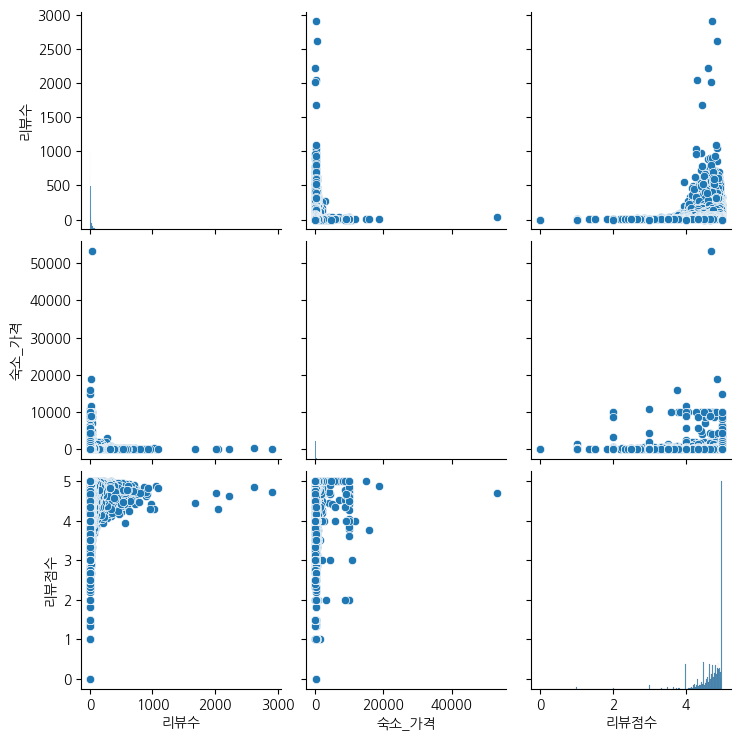

In [505]:
# 숙소_가격 대비 품질 비교
# 숙소의 리뷰수, 숙소_가격, 리뷰점수 간의 pairplot 시각화
sns.pairplot(df, vars=['리뷰수', '숙소_가격', '리뷰점수'])
plt.show()

In [510]:
# '리뷰수', '숙소_가격', '리뷰점수'의 상관계수 계산
correlation = df[['리뷰수', '숙소_가격', '리뷰점수']].corr()
print(correlation)

            리뷰수     숙소_가격      리뷰점수
리뷰수    1.000000 -0.021203  0.013625
숙소_가격 -0.021203  1.000000  0.012443
리뷰점수   0.013625  0.012443  1.000000


상관계수 보니 서로 연관이 없음을 확인
 - 그나마 리뷰 점수가 높을수록 리뷰수가 많다고 볼 수 있을듯.
 - 하지만 유의미한 값은 없는 것 같음.